In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
portfolio_data = pd.read_excel("portfolio_output.xlsx")
portfolio_data = portfolio_data.drop(portfolio_data.index[-1])
portfolio_data = portfolio_data.drop(columns = ["Unnamed: 13"])
portfolio_data

,Symbol,ISIN,Sector,Quantity Available,Quantity Long Term,Average Price,Previous Closing Price,Unrealized P&L,Invested,Current Value
0,DRREDDY,INE089A01031,HEALTHCARE,20.0,5.0,1185.5925,1167.20,-367.8500,23711.8500,23344.00
1,GOLDBEES-E,INF204KB17I5,ETF,994.0,0.0,110.4624,121.11,10583.7600,109799.6256,120383.34
2,IDFCFIRSTB,INE092T01019,FINANCIAL SERVICES,1180.0,1150.0,82.1558,83.12,1137.7500,96943.8440,98081.60
3,INDUSINDBK,INE095A01012,FINANCIAL SERVICES,20.0,0.0,753.8000,949.80,3920.0000,15076.0000,18996.00
4,INFY,INE009A01021,SOFTWARE SERVICES,15.0,9.0,1624.0867,1681.20,856.7000,24361.3005,25218.00
5,ITC,INE154A01025,FMCG,234.0,135.0,386.5626,333.20,-12486.8479,90455.6484,77968.80
6,KTKBANK,INE614B01018,FINANCIAL SERVICES,193.0,68.0,195.8173,189.10,-1296.4400,37792.7389,36496.30
7,MANAPPURAM,INE522D01027,FINANCIAL SERVICES,80.0,68.0,191.5351,314.45,9833.1900,15322.8080,25156.00
8,MUTHOOTMF,INE046W01019,NBFC,120.0,105.0,222.0495,181.07,-4917.5400,26645.9400,21728.40
9,NATCOPHARM,INE987B01026,HEALTHCARE,42.0,27.0,1044.1000,845.75,-8330.7000,43852.2000,35521.50


## 1.1 Use Histogram to display the investment counts

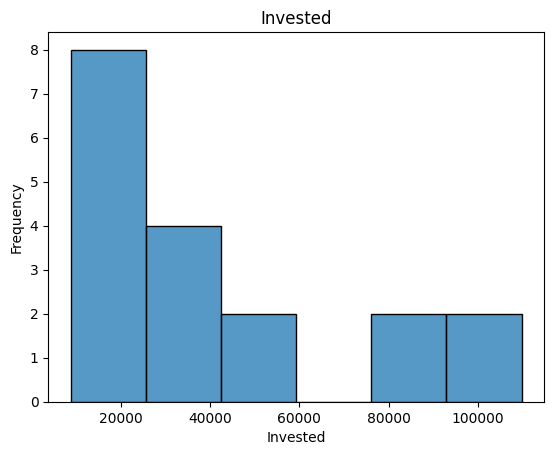

In [75]:
sns.histplot(data=portfolio_data,x="Invested",multiple="stack")
plt.xlabel("Invested")
plt.ylabel("Frequency")
plt.title("Invested")
plt.show()

## 1.2 CountPlot to display Sector wise how Stocks are invested

In [52]:
# Pandas to display counts
portfolio_data.groupby(by ="Sector")["Symbol"].count()

Sector
AUTO ANCILLARY        2
ENERGY                1
ETF                   1
FINANCIAL SERVICES    6
FMCG                  1
HEALTHCARE            3
METALS                1
NBFC                  1
SOFTWARE SERVICES     2
Name: Symbol, dtype: int64

AUTO ANCILLARY
ENERGY
ETF
FINANCIAL SERVICES
FMCG
HEALTHCARE
METALS
NBFC
SOFTWARE SERVICES


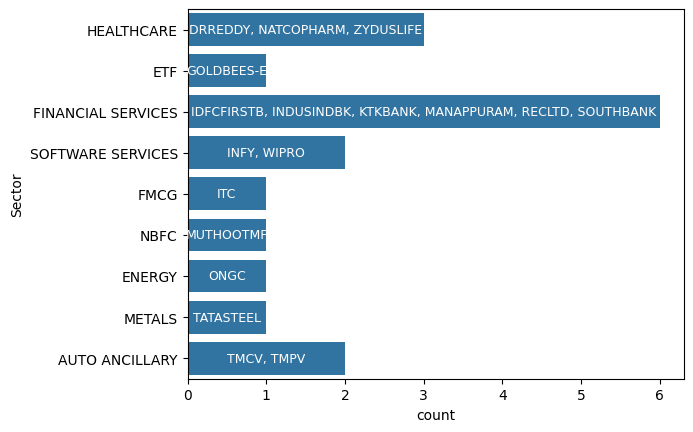

In [56]:
ax =sns.countplot(data=portfolio_data,y="Sector")

for sector, group in portfolio_data.groupby("Sector"):
    y = list(ax.get_yticklabels()).index(
        next(t for t in ax.get_yticklabels() if t.get_text() == sector)
    )
    stocks = ", ".join(group["Symbol"])
    ax.text(
        group.shape[0] / 2,
        y,
        stocks,
        va="center",
        ha="center",
        fontsize=9,
        color="white"
    )

## Use Pieplot display percentage of investment of each stock

In [80]:
#Using pandas to get percentage wise investment on the each sector
sector_sum = portfolio_data.groupby(by =["Symbol"])["Invested"].sum()
sector_percentage = sector_sum/sector_sum.sum() * 100
sector_percentage = sector_percentage.round(2).astype("str") + '%'
pd.DataFrame({'Invested':sector_sum,
              'Percentage': sector_percentage})

,Invested,Percentage
Symbol,,
DRREDDY,23711.8500,3.19%
GOLDBEES-E,109799.6256,14.78%
IDFCFIRSTB,96943.8440,13.05%
INDUSINDBK,15076.0000,2.03%
INFY,24361.3005,3.28%
ITC,90455.6484,12.18%
KTKBANK,37792.7389,5.09%
MANAPPURAM,15322.8080,2.06%
MUTHOOTMF,26645.9400,3.59%


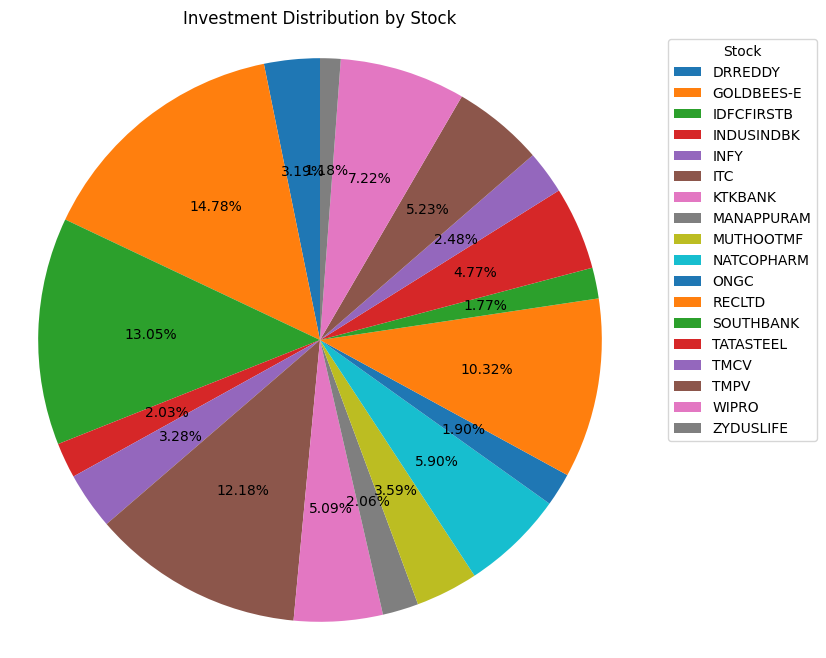

In [91]:
sector_sum = (
    portfolio_data
    .groupby("Symbol", as_index=False)["Invested"]
    .sum()
)

sector_sum["Percentage"] = (
    sector_sum["Invested"] / sector_sum["Invested"].sum() * 100
)

plt.figure(figsize=(8, 8))

plt.pie(
    sector_sum["Invested"],
    autopct="%1.2f%%",
    startangle=90
)

plt.legend(
    sector_sum["Symbol"],
    title="Stock",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.title("Investment Distribution by Stock")
plt.axis("equal")
plt.show()

## 2.1 Bar Plot

In [77]:
#Using Pandas to display the Stock wise count
portfolio_data.groupby(by ="Symbol")["Invested"].sum()

Symbol
DRREDDY        23711.8500
GOLDBEES-E    109799.6256
IDFCFIRSTB     96943.8440
INDUSINDBK     15076.0000
INFY           24361.3005
ITC            90455.6484
KTKBANK        37792.7389
MANAPPURAM     15322.8080
MUTHOOTMF      26645.9400
NATCOPHARM     43852.2000
ONGC           14151.2220
RECLTD         76636.7990
SOUTHBANK      13138.5200
TATASTEEL      35447.4225
TMCV           18427.1708
TMPV           38824.2820
WIPRO          53612.3280
ZYDUSLIFE       8746.0000
Name: Invested, dtype: float64

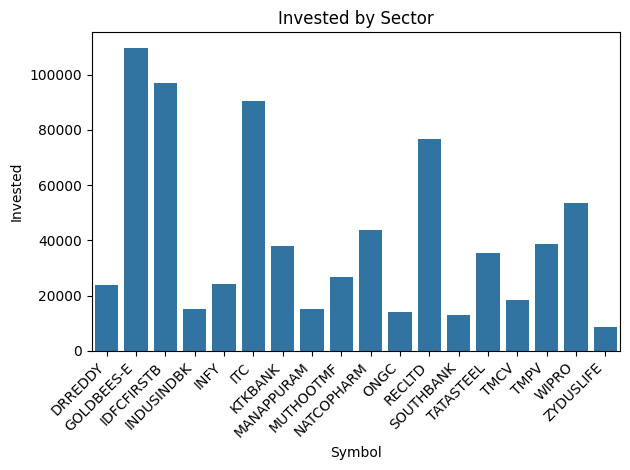

In [115]:
ax = sns.barplot(data=portfolio_data, x="Symbol", y="Invested")

ax.set_xlabel("Symbol")
ax.set_ylabel("Invested")

plt.xticks(rotation=45, ha="right")
plt.title("Invested by Sector")
plt.tight_layout()
plt.show()


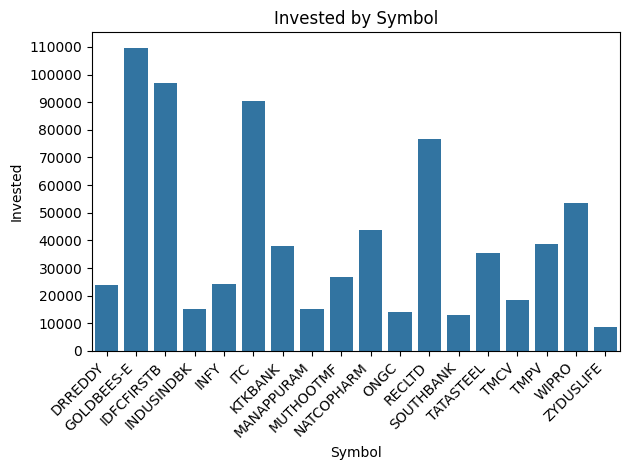

In [117]:
# sugggested by copilot for increasing 10000 increment in y axis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # for creating the tick range

ax = sns.barplot(data=portfolio_data, x="Symbol", y="Invested")

ax.set_xlabel("Symbol")
ax.set_ylabel("Invested")

# Get the max value of Invested to set tick range
y_max = portfolio_data["Invested"].max()

# Set y-ticks from 0 to max, step 10000
ax.set_yticks(np.arange(0, y_max + 10000, 10000))

plt.xticks(rotation=45, ha="right")
plt.title("Invested by Symbol")
plt.tight_layout()
plt.show()
